<a href="https://colab.research.google.com/github/ninja03jod/Machine_Learning_Projects/blob/main/Bank_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/Churn_Modelling.csv")
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [4]:
# lets check the record, columns and its names:
def Info(df):
  print(f"Total record is:{df.shape}\n")
  print(f"Columns names are:\n{df.columns}\n")
  print(f"Size of column is:{df.shape[1]}\n")
  print("*"*170)

  # Lets check the info about datatypes and null values:
  print(f"Info:\n")
  print(f"{df.info()}\n")
  print(f"Null values:\n{df.isnull().sum()}\n")

  # Here Data is classificational type so we have to check the data is imbalanced or not:
  print(f"lets see the Data is in proportion or not:\n{df.Exited.value_counts(normalize=True)*100}\n")
  print(f"Here the data is not in proportion\n")
  print(f"Exited is output column and 1 --> Yes -- Cutomer has left the bank or Customer has chunred\n")
  print(f"Exited is output column and 0 --> No -- Cutomer has not left the bank or Customer has not churned\n")
  print(f"*"*170)
  print(f"We can see the imbalanced data by another approch also\n")
  class_0 = np.round((df[df.Exited == 0].shape[0]/df.shape[0])*100,2)
  class_1 = np.round((df[df.Exited == 1].shape[0]/df.shape[0])*100,2)
  print(f"Customer who left the bank:{class_0}\n")
  print(f"Cutomer who not left the bank:{class_1}\n")
Info(df)

Total record is:(10000, 14)

Columns names are:
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Size of column is:14

**************************************************************************************************************************************************************************
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7  

In [4]:
!pip install ydata-profiling

Exception in thread Thread-5 (attachment_entry):
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/debugpy/server/api.py", line 237, in listen
    sock, _ = endpoints_listener.accept()
  File "/usr/lib/python3.10/socket.py", line 293, in accept
    fd, addr = self._accept()
TimeoutError: timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_debugpy.py", line 52, in attachment_entry
    debugpy.listen(_dap_port)
  File "/usr/local/lib/python3.10/dist-packages/debugpy/public_api.py", line 31, in wrapper
    return wrapped(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/debugpy/server/api.py", line 143, in debug
    log.reraise

In [5]:
!pip install --upgrade typing

In [6]:
# if we wants to check the summary or data information apply pandas profiling:
from ydata_profiling import ProfileReport

In [7]:
report = ProfileReport(df)

In [8]:
report.to_file("Bank_Churn.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: >

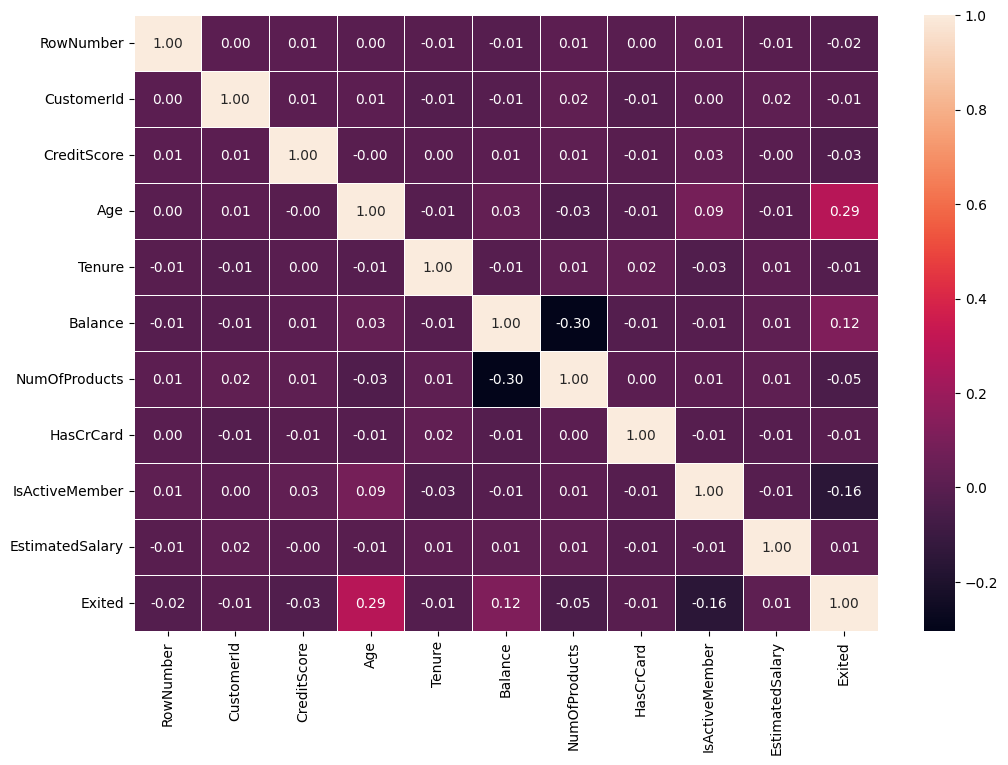

In [11]:
# lets see the correlation between each feature:
# Now we have to use logitstic regression due to binary output we have..
# So, input features or dependent features should not have multicollinearity..
# Beacuse multicollinearity makes challenginf for model to predict output...
plt.figure(figsize=(12,8))
sns.heatmap(data=df.corr(),annot=True,fmt=".2f",linewidth=0.7)

In [9]:
# lets take a look at first recrods:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [5]:
# lets fetch the categorical columns and numerical columns:
num_col = df.select_dtypes([int,float])
num_col.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [6]:
# length of numerical columns:
num_col.shape[1]

11

In [7]:
#cat_col:
cat_col = df.select_dtypes(object)
cat_col.columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

Through historam we get how many peoples has churned and the people who not left the company




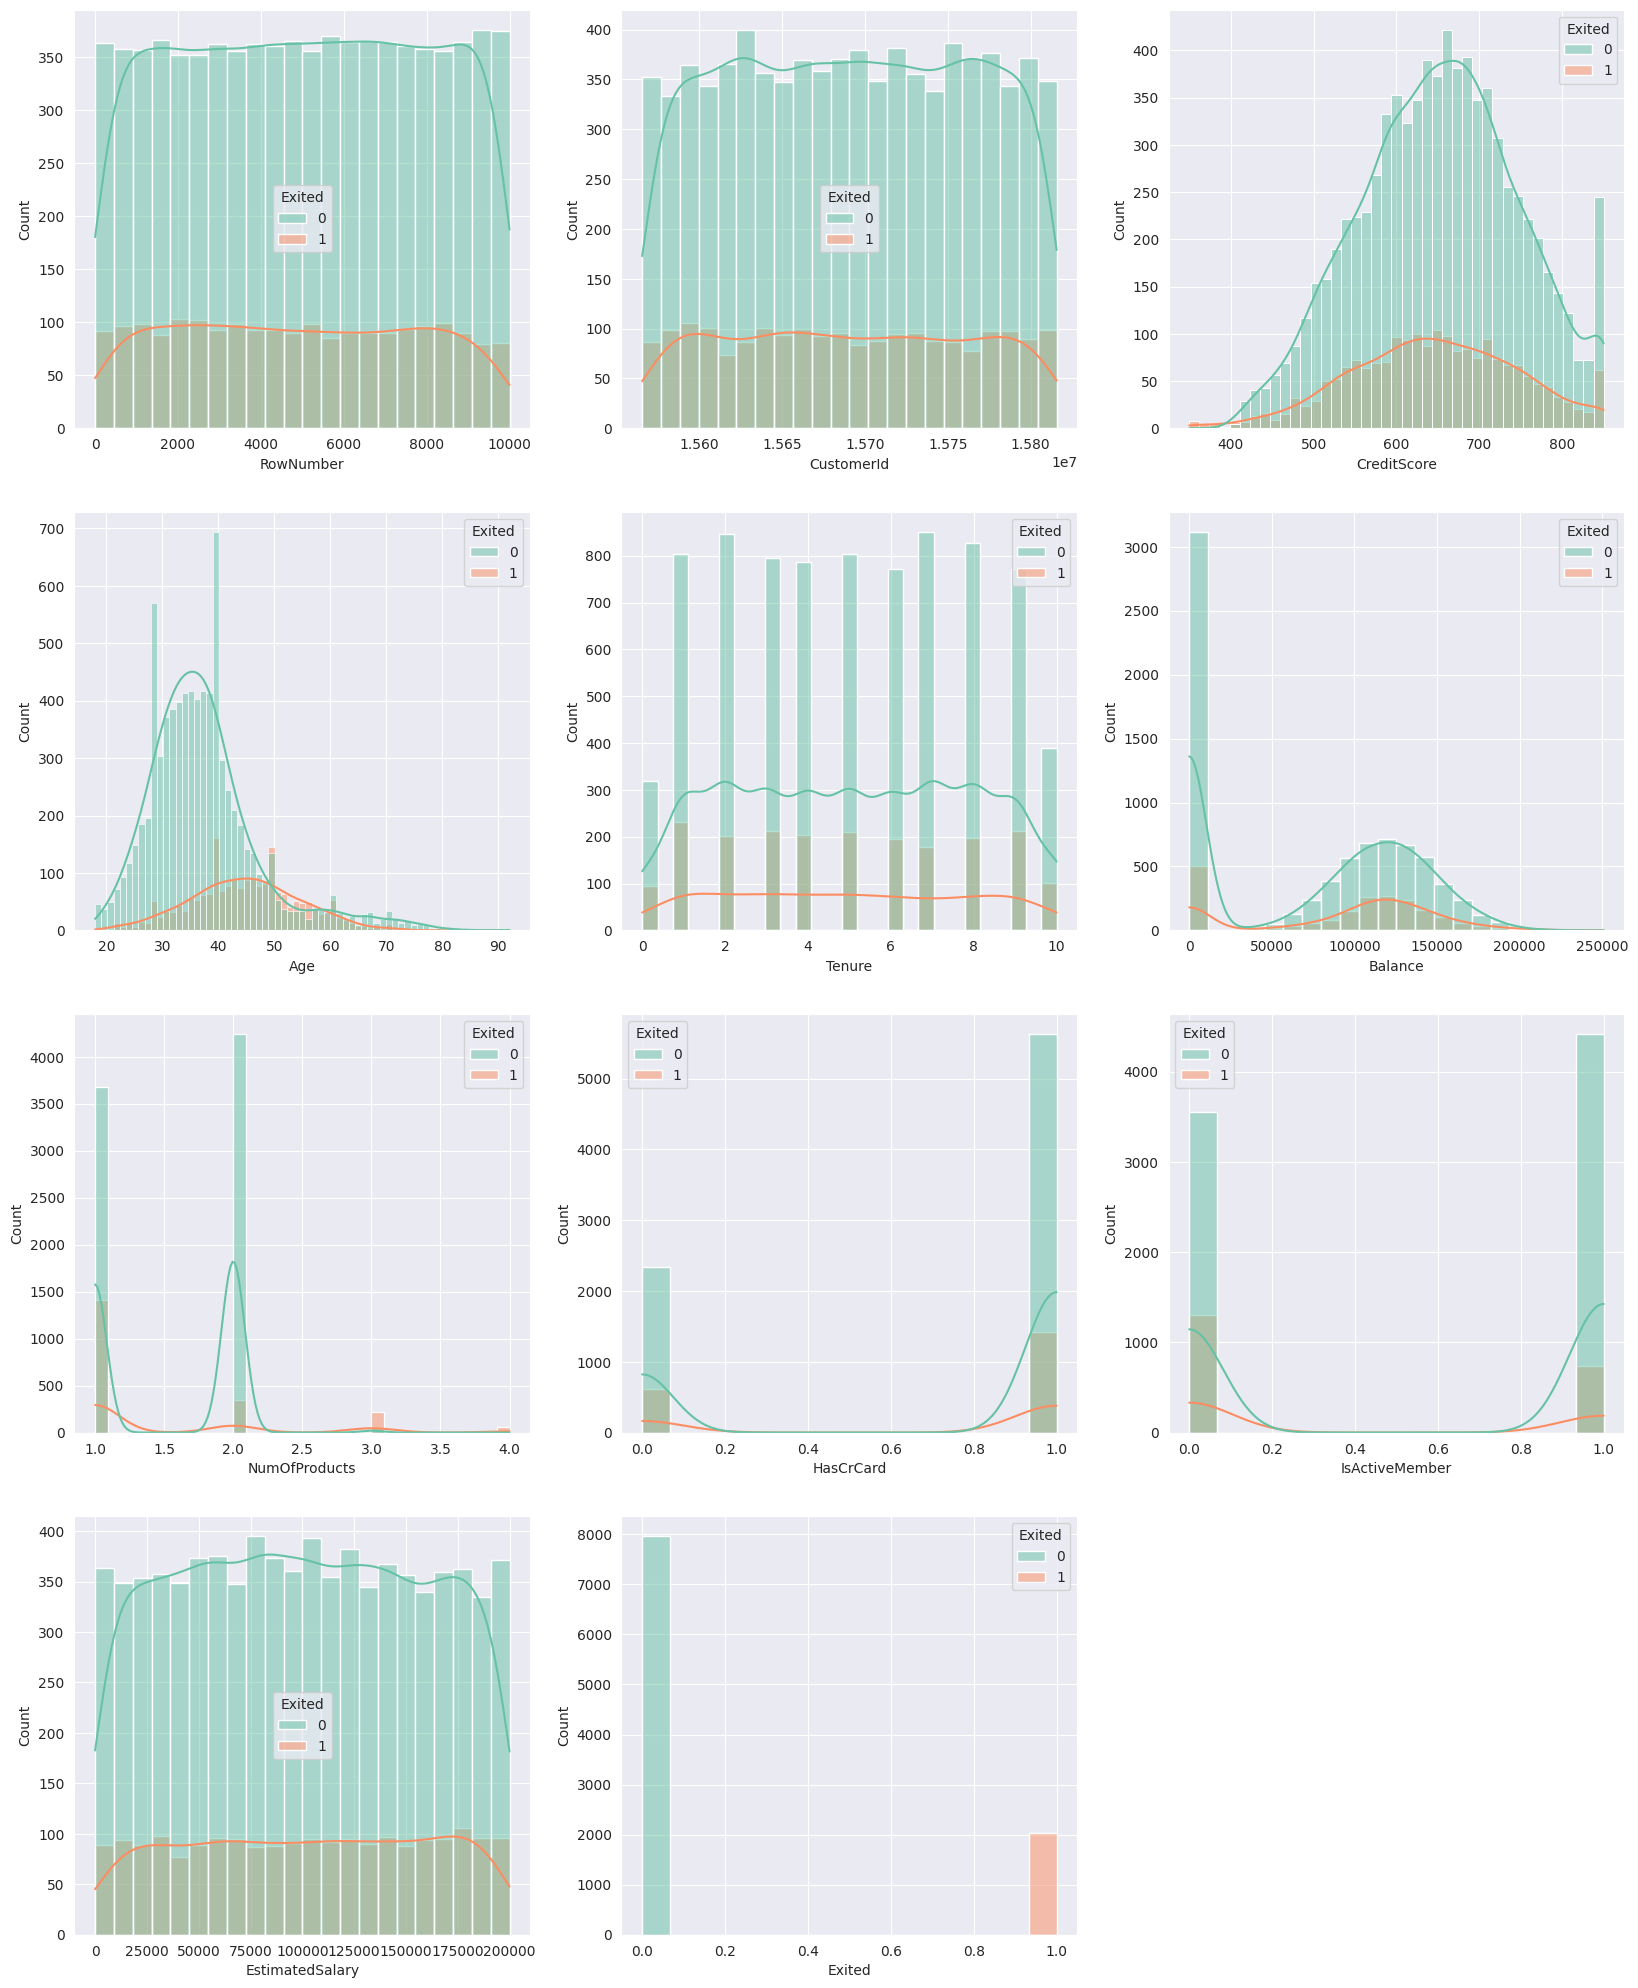

In [23]:
# lets fetch some insights from num_col:
print(f"Through historam we get how many peoples has churned and the people who not left the company\n\n")
plt.figure(figsize=(20,25))
sns.set_style("darkgrid")
sns.set_palette("Set2")
i = 1
for col in num_col.columns:
  plt.subplot(4,3,i)
  sns.histplot(data=num_col,x=col,kde=True,hue="Exited")
  i+=1

In [8]:
# lets see how female and male employees churned from the bank
gen = df.groupby("Gender")[['Exited']].value_counts().reset_index(name="Counts")
gen

Gender  Exited  Counts
0  Female       0    3404
1  Female       1    1139
2    Male       0    4559
3    Male       1     898

Most of female left the company than male



Text(0.5, 1.0, 'Gender distribution over Churn')

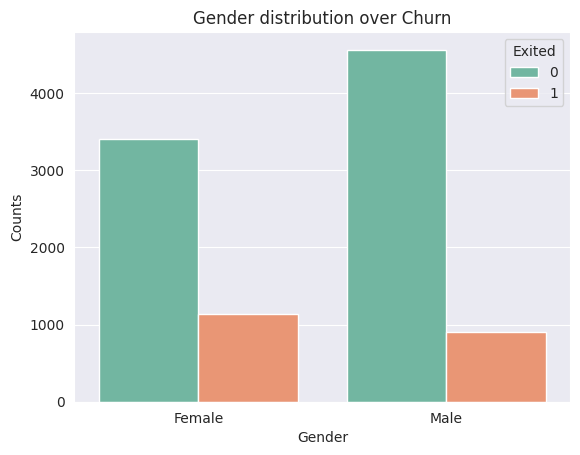

In [29]:
print(f"Most of female left the company than male\n")
sns.barplot(data=gen,x='Gender',y="Counts",hue="Exited")
plt.title("Gender distribution over Churn")

In [8]:
# lets see the age wise Estimated Salary of the employees who left the bank and Employess who stayed:
churn = df.groupby(['Age','Exited'])[['EstimatedSalary']].value_counts().reset_index()
churn

Age  Exited  EstimatedSalary  0
0      18       0          4777.23  1
1      18       0          9596.40  1
2      18       0        197322.13  1
3      18       0        171770.58  1
4      18       0        167689.56  1
...   ...     ...              ... ..
9995   84       1        188484.52  1
9996   85       0        116537.96  1
9997   88       0         52952.24  1
9998   92       0         34436.83  1
9999   92       0        195563.99  1

[10000 rows x 4 columns]

In this plot Employees with Age between 18 - 30 those have Volatality in Salary and some of them getting good Salary

Still those employees has left the company

Employee who cross age 60 and those who are getting less Salary and Highest salary they left the comapny



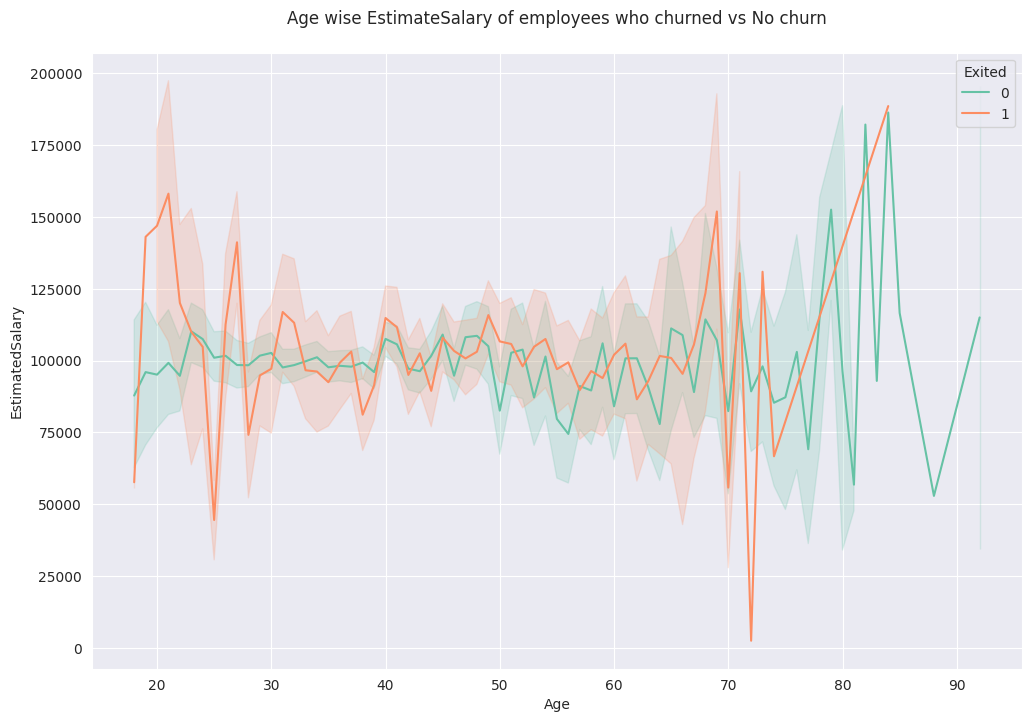

In [39]:
plt.figure(figsize=(12,8))
sns.lineplot(data=churn,x="Age",y="EstimatedSalary",hue="Exited")
plt.title("Age wise EstimateSalary of employees who churned vs No churn\n")
print(f"In this plot Employees with Age between 18 - 30 those have Volatality in Salary and some of them getting good Salary\n")
print(f"Still those employees has left the company\n")
print(f"Employee who cross age 60 and those who are getting less Salary and Highest salary they left the comapny\n")

In [9]:
# Lets see the region wise Employees churned vs no churned
region = df.groupby(['Exited'])[['Geography']].value_counts().reset_index(name="Counts")
region

Exited Geography  Counts
0       0    France    4204
1       0     Spain    2064
2       0   Germany    1695
3       1   Germany     814
4       1    France     810
5       1     Spain     413

In [10]:
# we have another approch for this:
pd.crosstab(df['Geography'],df['Exited'])

Exited        0    1
Geography           
France     4204  810
Germany    1695  814
Spain      2064  413

We have most Employees from France and Germany has left the company

But the difference between each region is most of the Employees from France are satyed in company rather than other two regions



Text(0.5, 1.0, 'Region wise Employees Churned vs No Churn\n')

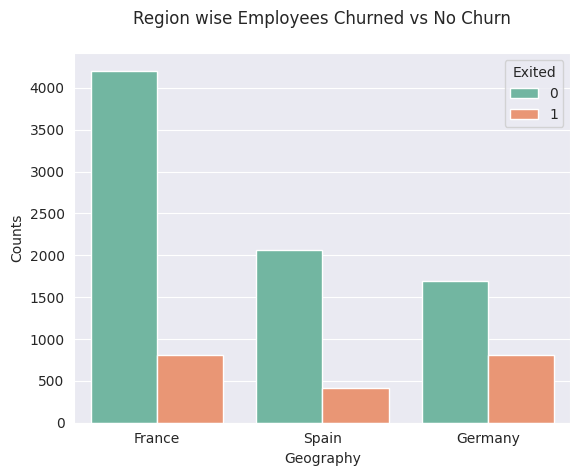

In [51]:
print(f"We have most Employees from France and Germany has left the company\n")
print(f"But the difference between each region is most of the Employees from France are satyed in company rather than other two regions\n")
sns.barplot(data=region,x="Geography",y="Counts",hue="Exited")
plt.title("Region wise Employees Churned vs No Churn\n")

In [11]:
# lets see the Age wise active members churned vs No churn:
active = df.groupby(["IsActiveMember","Exited"])[['Age']].value_counts().reset_index(name="Counts")
active

IsActiveMember  Exited  Age  Counts
0                 0       0   34     209
1                 0       0   33     207
2                 0       0   38     205
3                 0       0   37     200
4                 0       0   36     197
..              ...     ...  ...     ...
226               1       1   21       2
227               1       1   18       2
228               1       1   69       1
229               1       1   19       1
230               1       1   74       1

[231 rows x 4 columns]

Text(0.5, 1.0, 'Age wise Active member Vs Not Active Members')

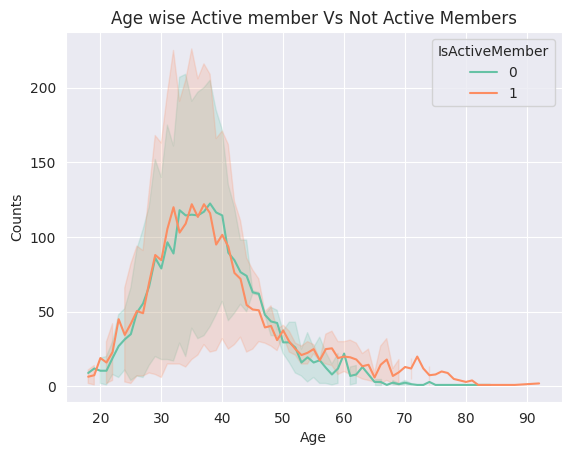

In [59]:
sns.lineplot(data=active,x="Age",y="Counts",hue="IsActiveMember")
plt.title("Age wise Active member Vs Not Active Members")

In [12]:
# lets see the Employees who chunred and No churn according to Age and Region:
new = df.groupby(["Geography","Age"])[['Exited']].value_counts().reset_index(name="Counts")
new

Geography  Age  Exited  Counts
0      France   18       0      10
1      France   18       1       1
2      France   19       0      11
3      France   20       0      21
4      France   21       0      30
..        ...  ...     ...     ...
348     Spain   77       0       2
349     Spain   78       0       2
350     Spain   79       0       1
351     Spain   80       0       1
352     Spain   88       0       1

[353 rows x 4 columns]

Text(0.5, 1.0, 'Region Wise Churned vs No Churn Counts\n')

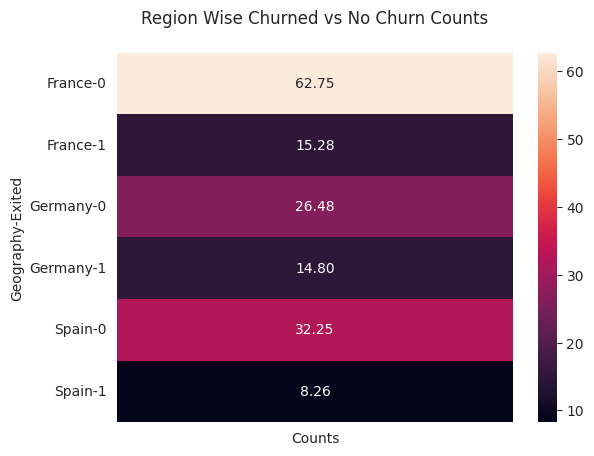

In [63]:
res = new.pivot_table(index=['Geography','Exited'],values = "Counts")
sns.heatmap(data=res,annot=True,fmt=".2f")
plt.title("Region Wise Churned vs No Churn Counts\n")

In [13]:
# lets see the Employees relation with bank in years and from those employees how many Employees are left the bank and Not left the bank
ten = df.groupby("Tenure")[['Exited']].value_counts().reset_index(name="counts")
ten

Tenure  Exited  counts
0        0       0     318
1        0       1      95
2        1       0     803
3        1       1     232
4        2       0     847
5        2       1     201
6        3       0     796
7        3       1     213
8        4       0     786
9        4       1     203
10       5       0     803
11       5       1     209
12       6       0     771
13       6       1     196
14       7       0     851
15       7       1     177
16       8       0     828
17       8       1     197
18       9       0     771
19       9       1     213
20      10       0     389
21      10       1     101

In [14]:
# Another Approch:
ten1 = ten.pivot_table(index=['Tenure','Exited'],values="counts")
ten1

counts
Tenure Exited        
0      0          318
       1           95
1      0          803
       1          232
2      0          847
       1          201
3      0          796
       1          213
4      0          786
       1          203
5      0          803
       1          209
6      0          771
       1          196
7      0          851
       1          177
8      0          828
       1          197
9      0          771
       1          213
10     0          389
       1          101

Text(0.5, 1.0, 'Employees Relation with the Bank in Years and from those How many are Churned and Not Churne\n')

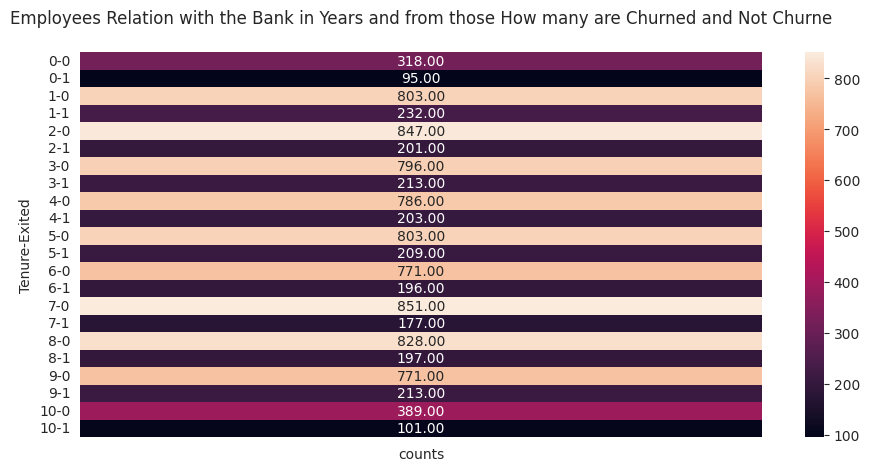

In [74]:
plt.figure(figsize=(11,5))
sns.heatmap(data=ten1,annot=True,fmt=".2f")
plt.title("Employees Relation with the Bank in Years and from those How many are Churned and Not Churne\n")

In [15]:
Gen = pd.crosstab(df['Gender'],df['Exited'])
Gen

Exited     0     1
Gender            
Female  3404  1139
Male    4559   898

Here Both male and female Behaviour is Same according to Churned

Both male and female Behaviour Who not Left the Bank is Totaly Different



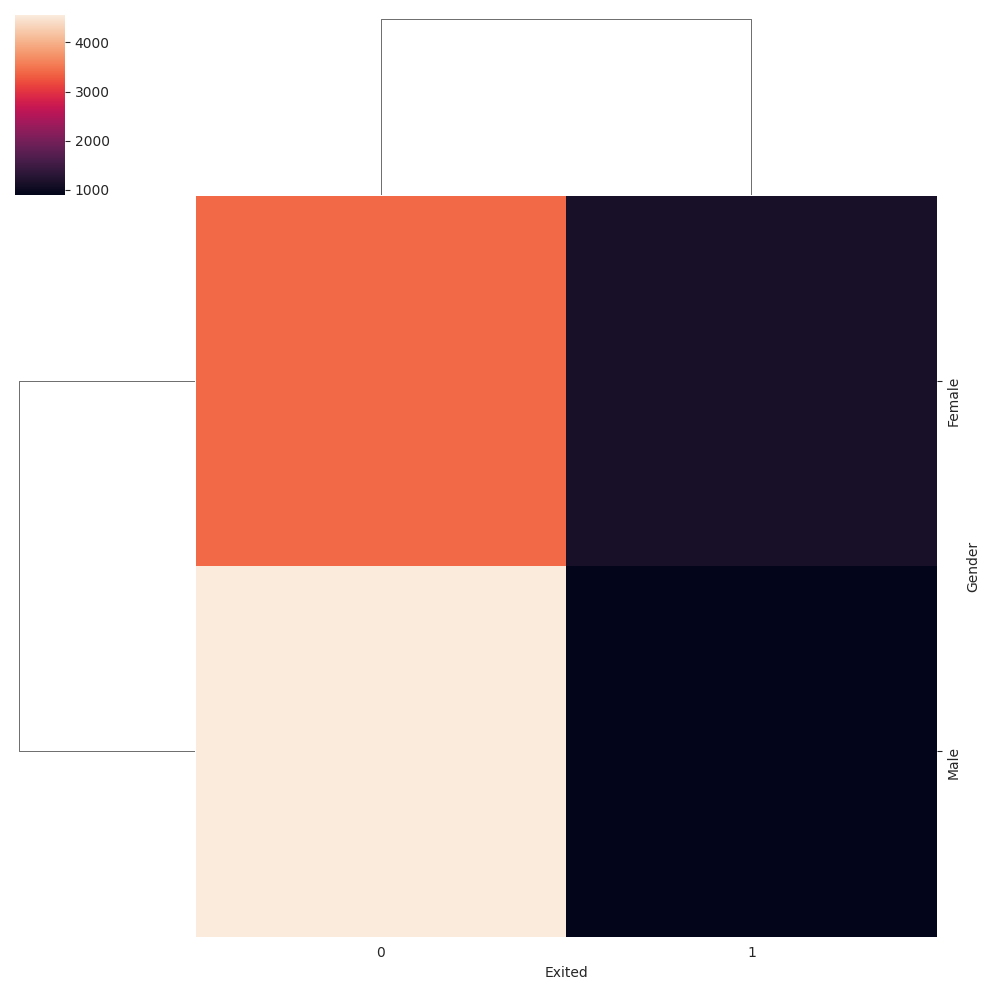

In [78]:
# Lets see the Gender wise Behaviour in Bank Across Churn rate:
print(f"Here Both male and female Behaviour is Same according to Churned\n")
print(f"Both male and female Behaviour Who not Left the Bank is Totaly Different\n")
sns.clustermap(Gen)

In [16]:
churned = df[df.Exited ==1]
Not_Churned = df[df.Exited == 0]

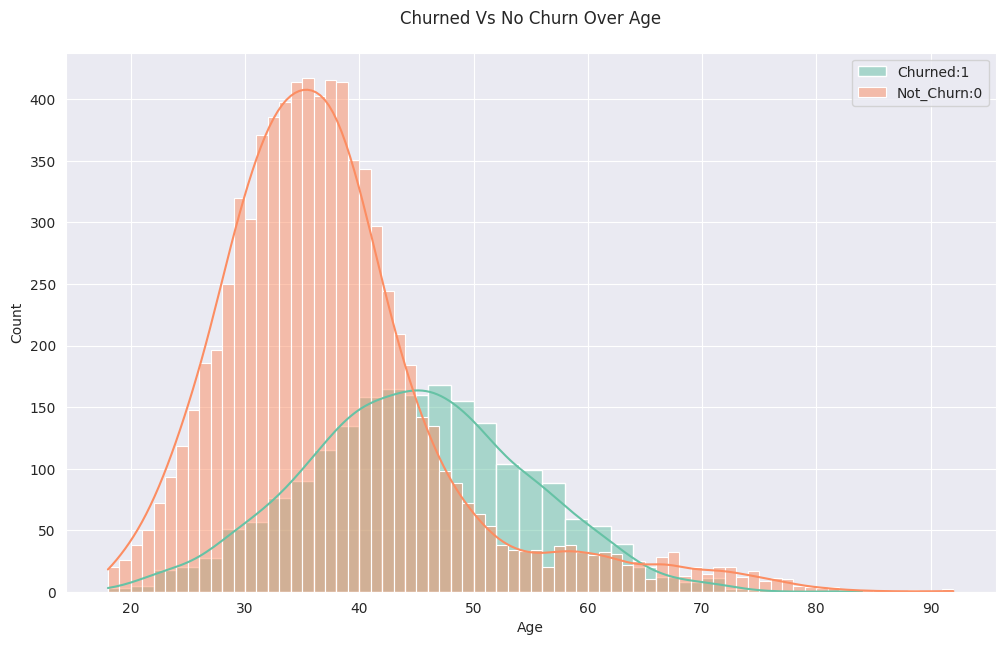

In [92]:
plt.figure(figsize=(12,7))
sns.histplot(churned['Age'],kde=True,label="Churned:1")
sns.histplot(Not_Churned['Age'],kde=True,label="Not_Churn:0")
plt.legend()
plt.title("Churned Vs No Churn Over Age\n")
plt.show()

In [17]:
# Lets see the top 10 credit score:
df.CreditScore.nlargest(10).reset_index()

index  CreditScore
0      4          850
1     38          850
2    180          850
3    200          850
4    223          850
5    259          850
6    356          850
7    411          850
8    451          850
9    466          850

In [18]:
# lets take a look on less credit score:
df.CreditScore.nsmallest(10)

1631    350
1838    350
8723    350
8762    350
9624    350
2473    351
1962    358
1405    359
1193    363
2579    365
Name: CreditScore, dtype: int64

Text(0.5, 1.0, 'Churn Rate According Estimated Salary\n')

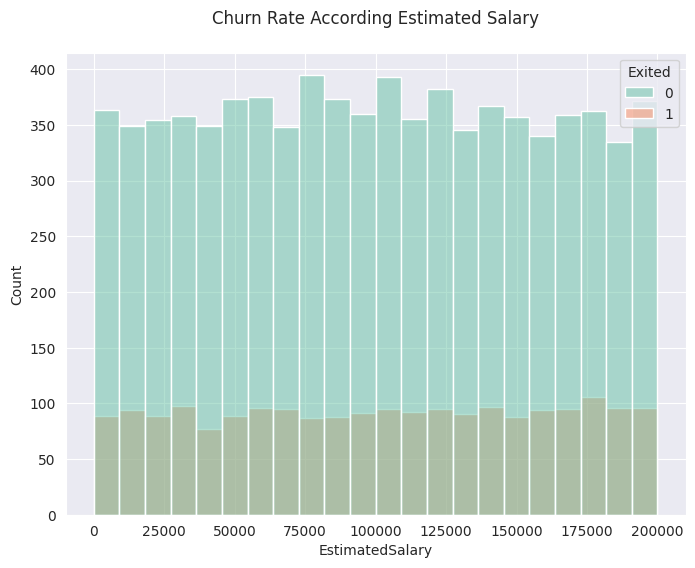

In [103]:
# lets see the Esitmated Salary wrt to Churn rate:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x="EstimatedSalary",hue="Exited")
plt.title("Churn Rate According Estimated Salary\n")

From below plot we know that the employees with Balance more than 85k those are left the bank



Text(0.5, 1.0, 'Tenure wrt to Bank Balance over Churn Rate\n')

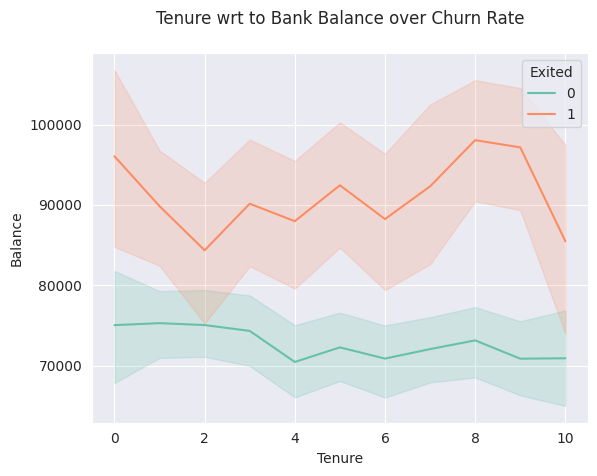

In [111]:
# Lets see the Tenure wise Churn rate across Balance in Bank:
print("From below plot we know that the employees with Balance more than 85k those are left the bank\n")
sns.lineplot(data=df,x="Tenure",y="Balance",hue="Exited")
plt.title("Tenure wrt to Bank Balance over Churn Rate\n")

In [9]:
# here we dont need some of columns lets remove it:
df.drop(columns =['RowNumber','Surname'],inplace=True)

In [10]:
num_col.drop(columns=['RowNumber'],inplace=True)

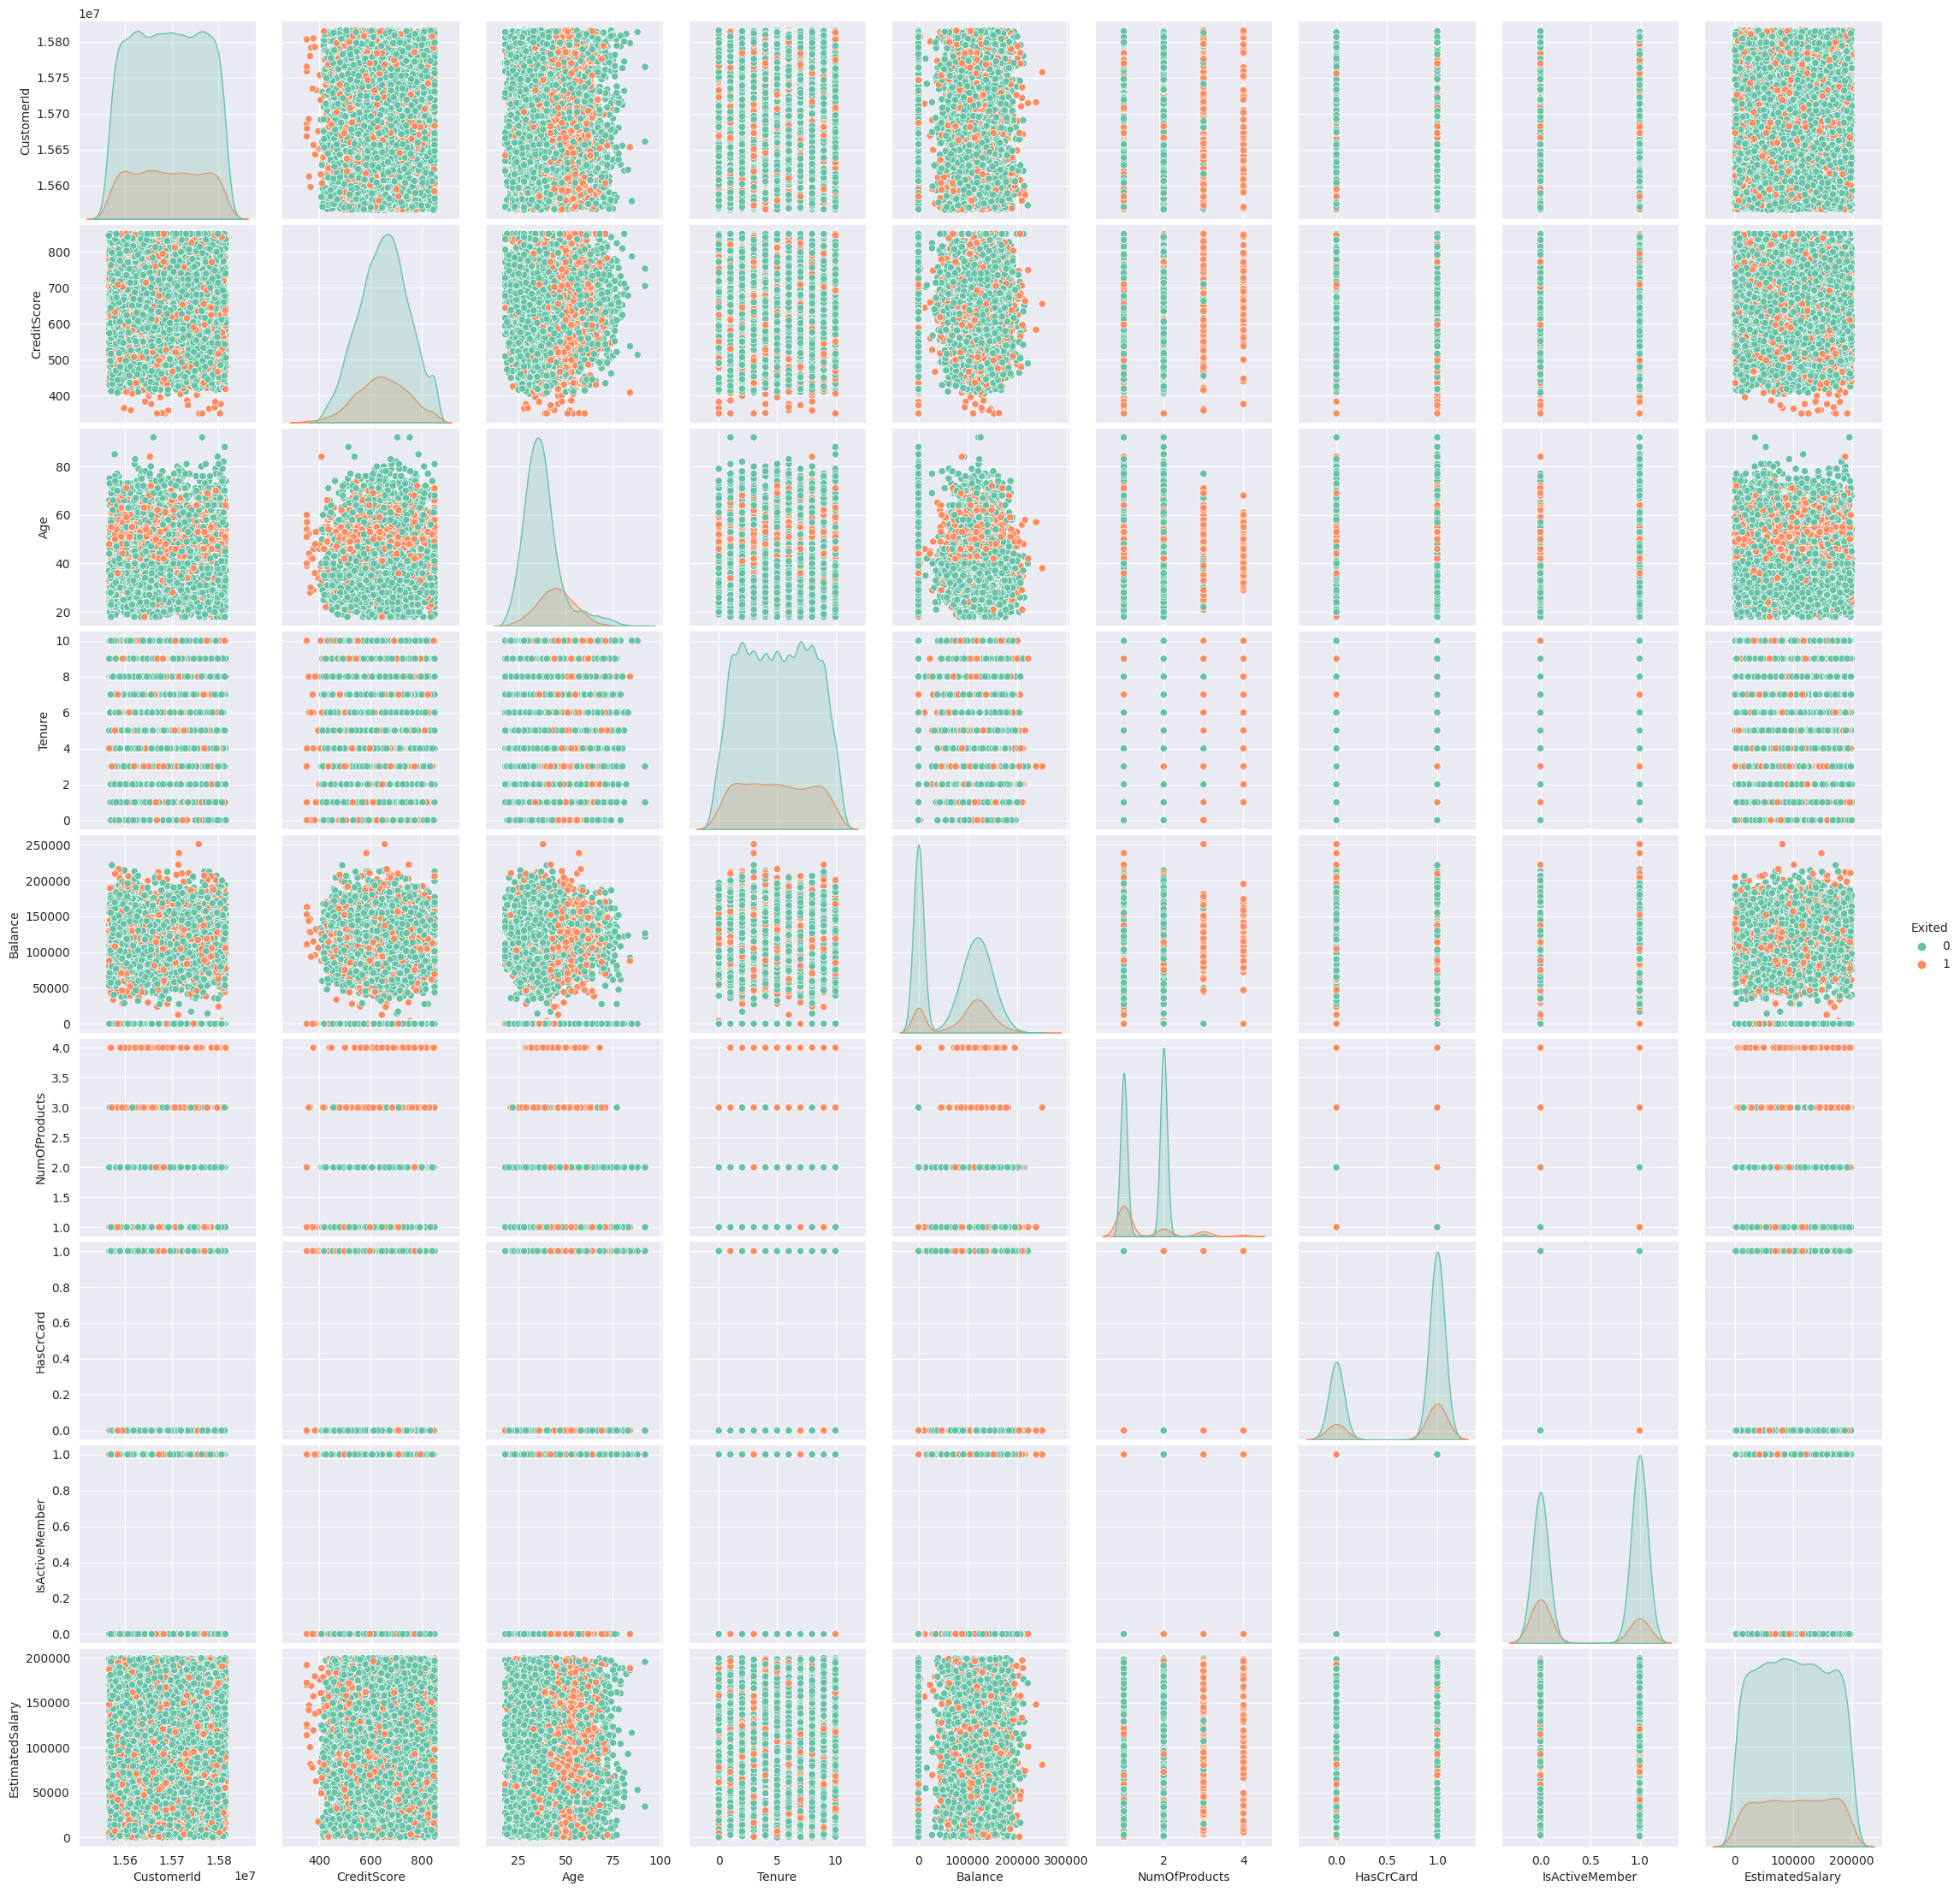

In [117]:
# lets see the pairplot:
sns.pairplot(data=df,hue="Exited")

Detect the Outliers Over Numerical Columns Across Chrun Rate



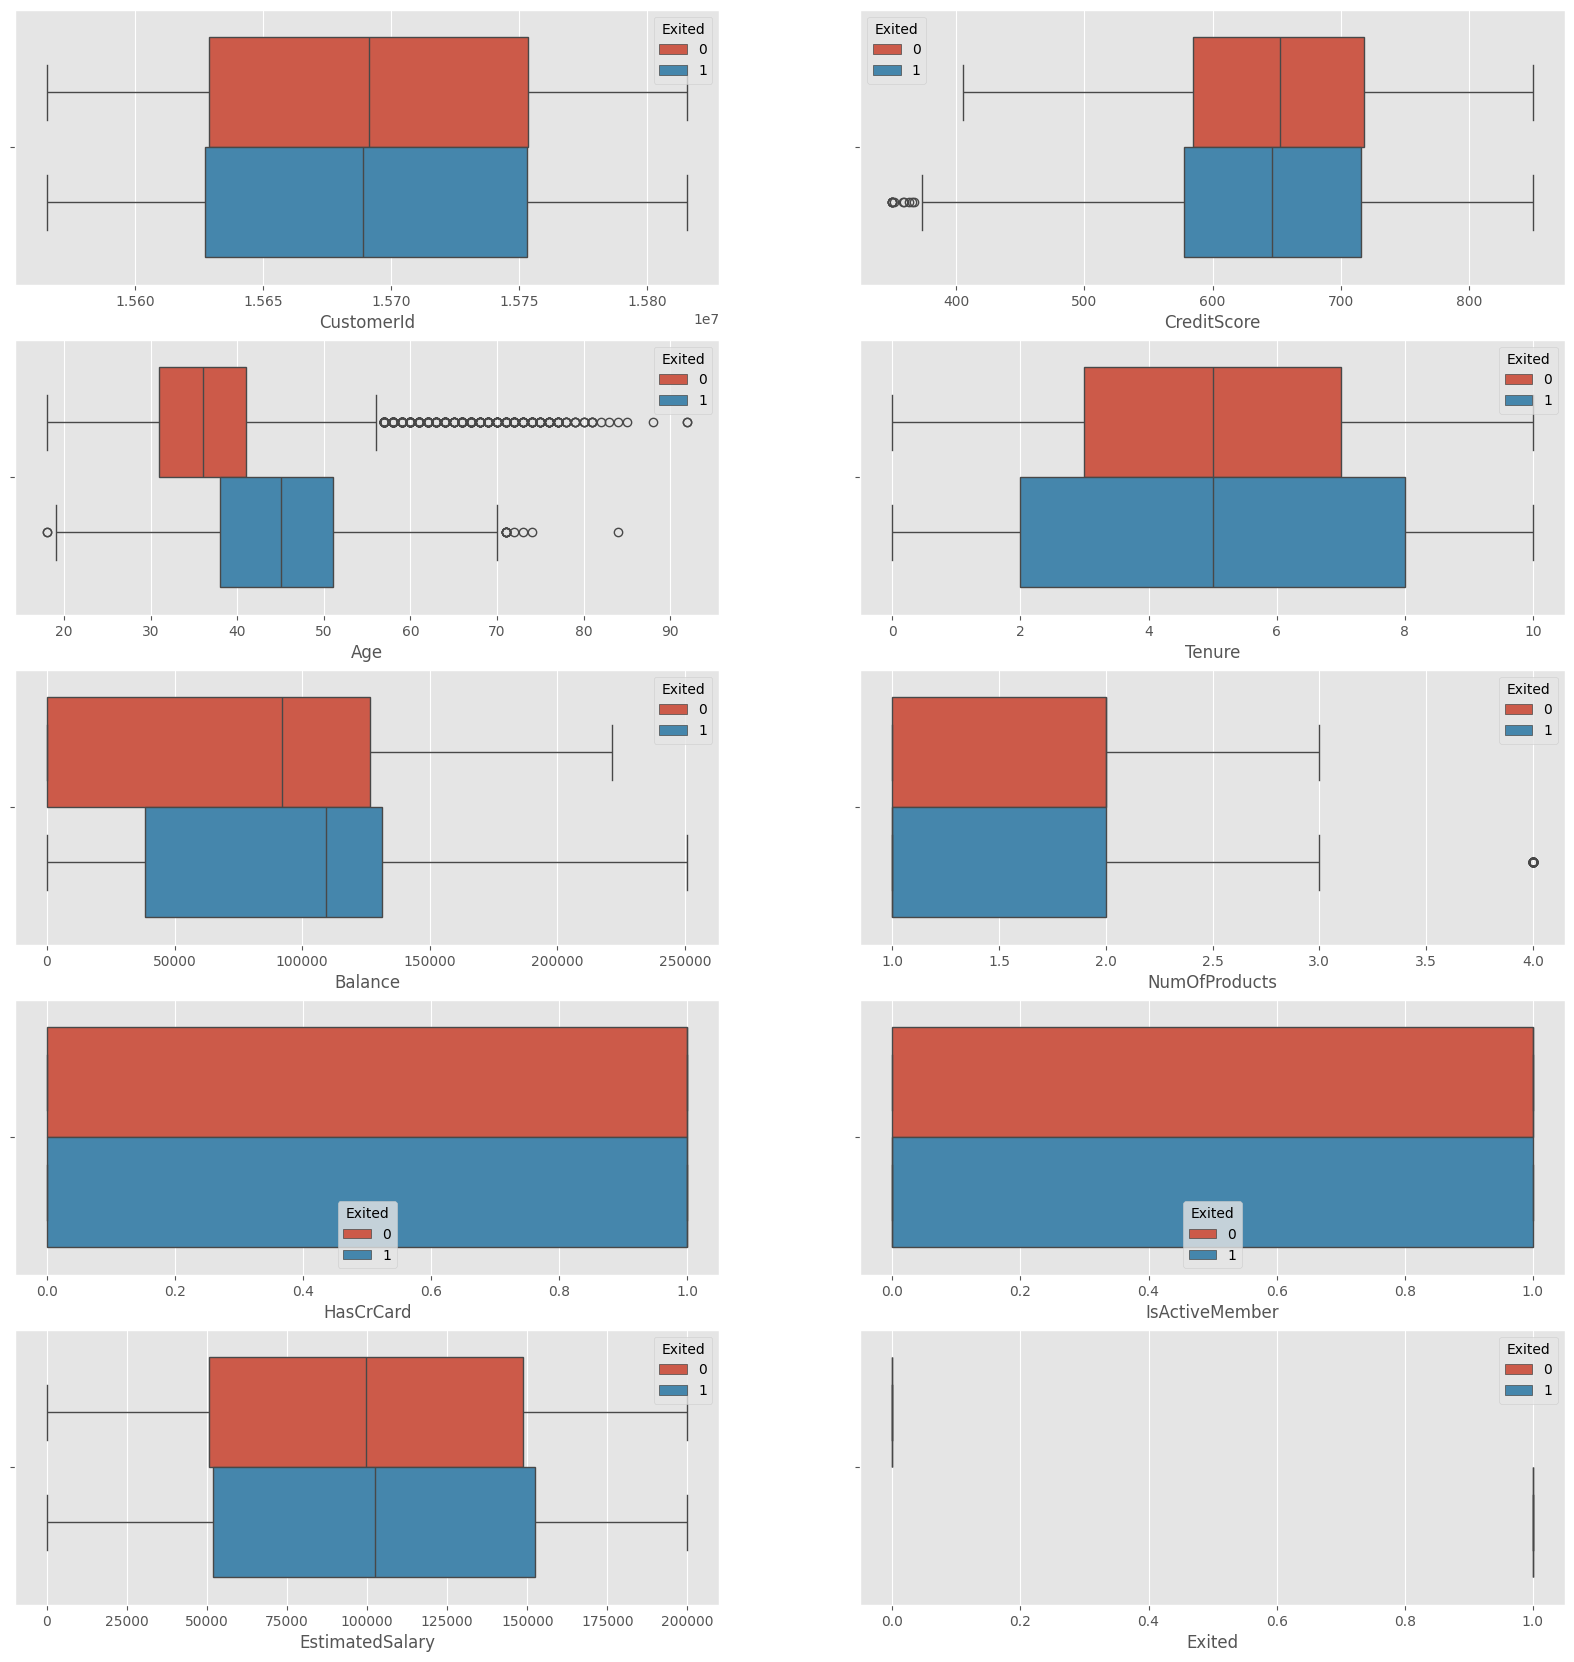

In [29]:
# lets see the outliers:
print(f"Detect the Outliers Over Numerical Columns Across Chrun Rate\n")
plt.style.use("ggplot")
plt.figure(figsize=(20,25))
i = 1
for col in num_col.columns:
  plt.subplot(6,2,i)
  sns.boxplot(data=num_col,x=col,hue="Exited")
  i+=1

In [11]:
# lets import library to build the model and do some labelencoding,and standrdization:
from sklearn.preprocessing import LabelEncoder,StandardScaler

# For model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # Data splitting and for startified sampling
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,classification_report # Model Evaluation

# For decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

### ***Data Splitting***

In [14]:
print(f"Here we are not able to get the data in proportion Now we have to use Under or Over Sampling Technique")
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)

y_train.value_counts(normalize=True)*100

Here we are not able to get the data in proportion Now we have to use Under or Over Sampling Technique


0    79.626667
1    20.373333
Name: Exited, dtype: float64

In [15]:
# We dont need the surname column lets remove it from cat_col:
cat_col.drop(columns=['Surname'],inplace=True)

In [16]:
# lets do the labelencoding:
encode = LabelEncoder()
for i in cat_col.columns:
  df[i] = encode.fit_transform(df[i])

In [17]:
X  =df.drop(columns=['Exited'])
y = df['Exited']

### ***Basically We have Uner Sampling and Over Sampling technique***
##### ***In UnderSampling Technique We reduces the number of Instances of Majority Class and In OverSampling Technique we increases number of Instances of Minority Class***
##### ***In UnderSampling due to reducing the Majority Class it might be Deletes useful Info and may Chances to increase the false Positives..***
##### ***In OverSampling due to Increasing the Minority class it might be generates Duplicates in the dataset and their might be increase in number of False Negatives***

---



### ***SMOTE:***
##### ***Present in over_sampling Module used to Increase the number of Instances of Minority class.***
##### ***In case of SMOTE did not generate the duplicates,It creates an Instances similar to it. SMOTE does not duplicates the the existing instances...Instead it generates new instances  by considering relation with existing instances.***

In [18]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
# Lets import the SMOTE:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [20]:
x_resampled,y_resampled = smote.fit_resample(x_train,y_train)

In [21]:
# We can check the data is imbalanced or not:
y_resampled.value_counts(normalize=True)*100

0    50.0
1    50.0
Name: Exited, dtype: float64

In [22]:
# Now we have to split it again to get better model performance over unseen data:
X_train,X_test,Y_train,Y_test = train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)

In [23]:
X_train.shape,X_test.shape

((10169, 11), (2543, 11))

In [24]:
X_train.head() # In this case we have numerical columns with values 0-10 and for other numerical columns have large values so we need to standardize it...

CustomerId  CreditScore  Geography  Gender  Age  Tenure        Balance  \
6688     15633944          644          2       1   32       3  136659.740000   
12066    15779522          650          0       1   59       5   44870.754798   
3827     15748660          561          1       0   49       1  102025.320000   
9895     15729251          724          1       0   40       5  132067.521611   
12480    15707939          528          1       0   39       1   97564.775923   

       NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
6688               1          1               1     14187.780000  
12066              1          1               0     29380.669873  
3827               1          1               0    133051.640000  
9895               1          1               1      5627.979310  
12480              1          0               1    196168.831584

In [25]:
# Standrdiation : Will get the values over each column within range -1 to 1
# Mean of each column will be 0 and std will be 1
scaler = StandardScaler()
X_train_Scaled  = scaler.fit_transform(X_train)
X_test_Scaled  = scaler.fit_transform(X_test)

In [ ]:
# After standardization we get the data in 2d Numpy array:

### ***Modeling***

In [26]:
model = LogisticRegression()
model

LogisticRegression()

In [27]:
# training:
model.fit(X_train_Scaled,Y_train)

LogisticRegression()

In [28]:
# test:
Y_pred = model.predict(X_test_Scaled)
Y_pred

array([0, 1, 0, ..., 0, 1, 1])

In [29]:
# Actual data:
Y_test.values

array([0, 1, 0, ..., 0, 1, 0])

### ***Evaluation***

In [30]:
# Accuracy:
accuracy_score(Y_test,Y_pred)*100

79.04050334250886

In [31]:
# confusion matrix:
con_mat = confusion_matrix(Y_test,Y_pred)
con_mat

array([[ 997,  306],
       [ 227, 1013]])

<Axes: >

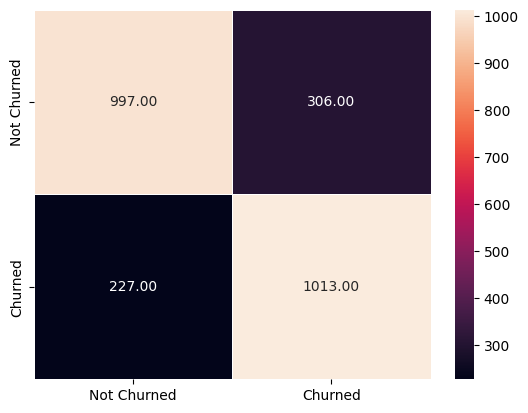

In [36]:
# lets implment confusion matrix in heatmap:1
sns.heatmap(data=con_mat,annot=True,fmt=".2f",linewidth=0.6,xticklabels=['Not Churned',"Churned"],yticklabels=['Not Churned',"Churned"])

In [32]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1303
           1       0.77      0.82      0.79      1240

    accuracy                           0.79      2543
   macro avg       0.79      0.79      0.79      2543
weighted avg       0.79      0.79      0.79      2543



In [34]:
# recall: used to check the positive prediction done by the model by catching the False Negatives:
recall_score(Y_test,Y_pred)*100

81.69354838709677

In [37]:
# precision Score: used to check the positive prediction done by the model by catching False Positives:
round(precision_score(Y_test,Y_pred)*100)

77

In [38]:
# lets check the logregression plot Actual vs Predicted:
ndf = pd.DataFrame({"Actual":Y_test,"Predicted":Y_pred})
ndf

Actual  Predicted
921         0          0
8487        1          1
4030        0          0
6896        0          0
11895       1          1
...       ...        ...
10850       1          1
11799       1          1
5156        0          0
8118        1          1
2619        0          1

[2543 rows x 2 columns]

<Axes: >

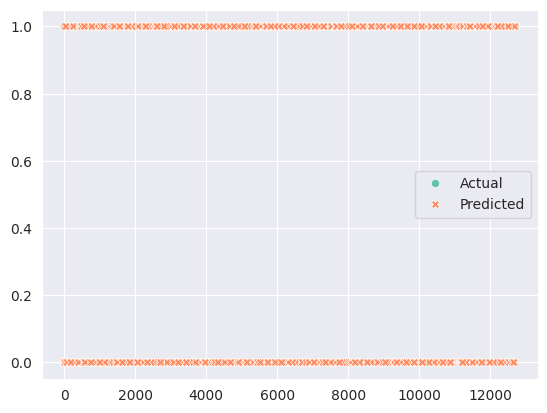

In [39]:
sns.set_style("darkgrid")
sns.set_palette("Set2")
sns.scatterplot(ndf)

In [40]:
df

CustomerId  CreditScore  Geography  Gender  Age  Tenure    Balance  \
0       15634602          619          0       0   42       2       0.00   
1       15647311          608          2       0   41       1   83807.86   
2       15619304          502          0       0   42       8  159660.80   
3       15701354          699          0       0   39       1       0.00   
4       15737888          850          2       0   43       2  125510.82   
...          ...          ...        ...     ...  ...     ...        ...   
9995    15606229          771          0       1   39       5       0.00   
9996    15569892          516          0       1   35      10   57369.61   
9997    15584532          709          0       0   36       7       0.00   
9998    15682355          772          1       1   42       3   75075.31   
9999    15628319          792          0       0   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0                 1          1               1        101348.88       1  
1                 1          0               1        112542.58       0  
2                 3          1               0        113931.57       1  
3                 2          0               0         93826.63       0  
4                 1          1               1         79084.10       0  
...             ...        ...             ...              ...     ...  
9995              2          1               0         96270.64       0  
9996              1          1               1        101699.77       0  
9997              1          0               1         42085.58       1  
9998              2          1               0         92888.52       1  
9999              1          1               0         38190.78       0  

[10000 rows x 12 columns]

In [42]:
# For knowledge purpose i am using the Sacling Technique:
# here we ahve X and y now just split the data:
x1_train,x1_test,y1_train,y1_test = train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=0)

In [43]:
from sklearn.preprocessing import MinMaxScaler,MaxAbsScaler,RobustScaler

In [45]:
df1 = df

In [64]:
ndf = pd.read_csv("/content/Churn_Modelling.csv")
ndf.drop(columns=['RowNumber','Surname'],inplace=True)
for i in cat_col.columns:
  ndf[i] = encode.fit_transform(ndf[i])

In [66]:
df2 = ndf
df3 = ndf

In [ ]:
# df1 --> We use MinMaxScaler:
# It is part of normalization --> Normalization is conversion of Numerical columns to the common scale
# MinMaxScaler: Used to convert Numerical columns within range 0 - 1
# basically we used MinMaxScaler when we know the min and max value
# Min value will be 0 and max value will be 1 after scaling
# formula: xi = Xi - Xmin / Xmax - Xmin
# When we use fit_transform --> fit is for to checking the min and max from each columns
# transform is used to supply the formula over each value.

In [46]:
mm = MinMaxScaler()

In [56]:
for i in df1.columns:
  df1[[i]] = mm.fit_transform(df1[[i]])

In [57]:
df1

CustomerId  CreditScore  Geography  Gender       Age  Tenure   Balance  \
0       0.275616        0.538        0.0     0.0  0.324324     0.2  0.000000   
1       0.326454        0.516        1.0     0.0  0.310811     0.1  0.334031   
2       0.214421        0.304        0.0     0.0  0.324324     0.8  0.636357   
3       0.542636        0.698        0.0     0.0  0.283784     0.1  0.000000   
4       0.688778        1.000        1.0     0.0  0.337838     0.2  0.500246   
...          ...          ...        ...     ...       ...     ...       ...   
9995    0.162119        0.842        0.0     1.0  0.283784     0.5  0.000000   
9996    0.016765        0.332        0.0     1.0  0.229730     1.0  0.228657   
9997    0.075327        0.718        0.0     0.0  0.243243     0.7  0.000000   
9998    0.466637        0.844        0.5     1.0  0.324324     0.3  0.299226   
9999    0.250483        0.884        0.0     0.0  0.135135     0.4  0.518708   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          0.000000        1.0             1.0         0.506735     1.0  
1          0.000000        0.0             1.0         0.562709     0.0  
2          0.666667        1.0             0.0         0.569654     1.0  
3          0.333333        0.0             0.0         0.469120     0.0  
4          0.000000        1.0             1.0         0.395400     0.0  
...             ...        ...             ...              ...     ...  
9995       0.333333        1.0             0.0         0.481341     0.0  
9996       0.000000        1.0             1.0         0.508490     0.0  
9997       0.000000        0.0             1.0         0.210390     1.0  
9998       0.333333        1.0             0.0         0.464429     1.0  
9999       0.000000        1.0             0.0         0.190914     0.0  

[10000 rows x 12 columns]

<Axes: >

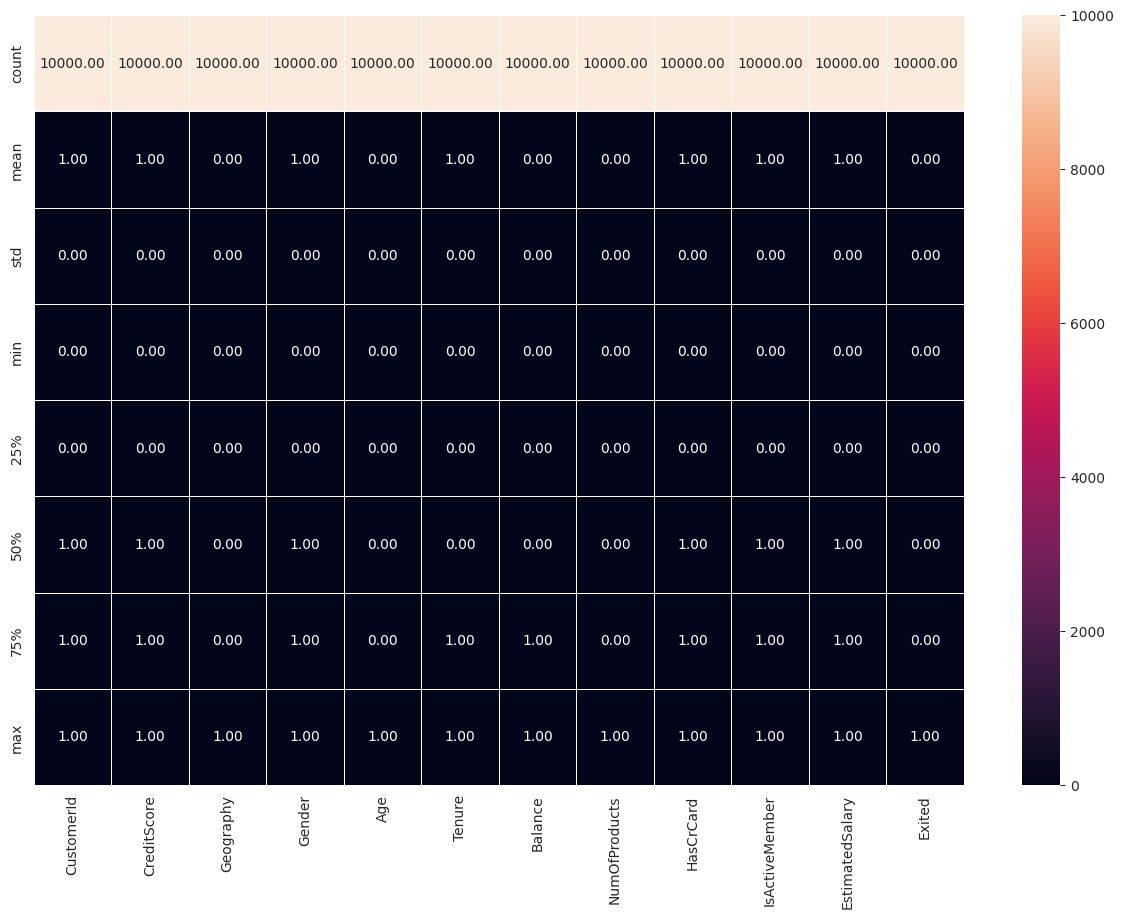

In [61]:
# Now if we check the min and max value it would be within range 0 - 1.
plt.figure(figsize=(15,10))
sns.heatmap(data=round(df1.describe()),annot=True,fmt=".2f",linewidth=0.7)

In [63]:
# df2 --> MaxAbsScaler:
# It is used to convert numerical columns into common scale within range [0 to 1]
# Min and amx value of each column will be 0 and 1
# When we have most of zeros available in dataset then we used MaxAbsScaler
# formula : xi = Xi / Abs(Xmax)
# When we used fit_transform --> fit --> purpose of fit is to cal the abs max value adn transform will supply formula over each value of column

In [67]:
ma = MaxAbsScaler()

In [68]:
for i in df2.columns:
  df2[[i]] = ma.fit_transform(df[[i]])

In [69]:
df2

CustomerId  CreditScore  Geography  Gender       Age  Tenure   Balance  \
0       0.275616        0.538        0.0     0.0  0.324324     0.2  0.000000   
1       0.326454        0.516        1.0     0.0  0.310811     0.1  0.334031   
2       0.214421        0.304        0.0     0.0  0.324324     0.8  0.636357   
3       0.542636        0.698        0.0     0.0  0.283784     0.1  0.000000   
4       0.688778        1.000        1.0     0.0  0.337838     0.2  0.500246   
...          ...          ...        ...     ...       ...     ...       ...   
9995    0.162119        0.842        0.0     1.0  0.283784     0.5  0.000000   
9996    0.016765        0.332        0.0     1.0  0.229730     1.0  0.228657   
9997    0.075327        0.718        0.0     0.0  0.243243     0.7  0.000000   
9998    0.466637        0.844        0.5     1.0  0.324324     0.3  0.299226   
9999    0.250483        0.884        0.0     0.0  0.135135     0.4  0.518708   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          0.000000        1.0             1.0         0.506735     1.0  
1          0.000000        0.0             1.0         0.562709     0.0  
2          0.666667        1.0             0.0         0.569654     1.0  
3          0.333333        0.0             0.0         0.469120     0.0  
4          0.000000        1.0             1.0         0.395400     0.0  
...             ...        ...             ...              ...     ...  
9995       0.333333        1.0             0.0         0.481341     0.0  
9996       0.000000        1.0             1.0         0.508490     0.0  
9997       0.000000        0.0             1.0         0.210390     1.0  
9998       0.333333        1.0             0.0         0.464429     1.0  
9999       0.000000        1.0             0.0         0.190914     0.0  

[10000 rows x 12 columns]

<Axes: >

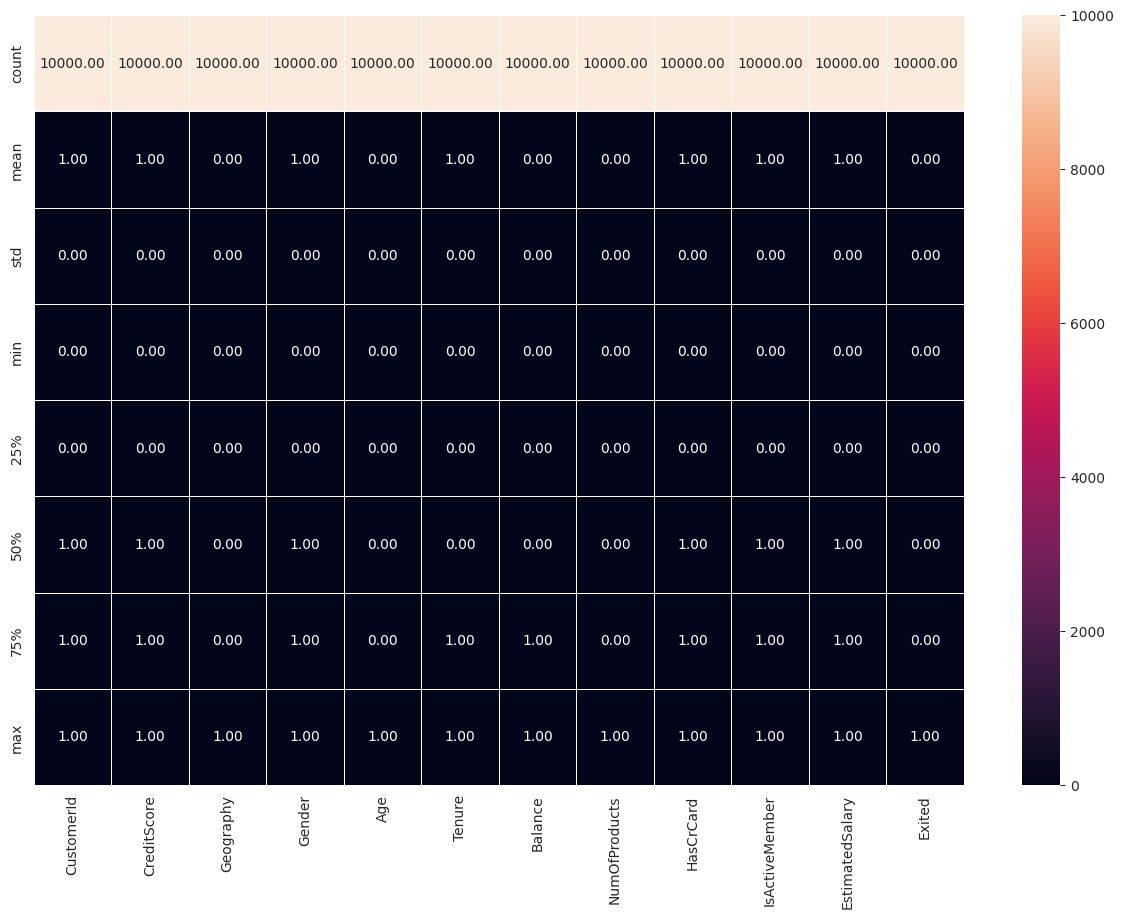

In [70]:
# Lets see the max and min values :
plt.figure(figsize=(15,10))
sns.heatmap(data=round(df2.describe()),annot=True,fmt=".2f",linewidth=0.6)

In [ ]:
# df3 --> RobustScaler:
# It used to convert numerical columns withi range accroding to median of each column and IQR --> InterquartileRange
# IQR (75th per - 25th per)
# We used RobustScaler when we have multiple Outliers
# It is Robust to Outliers
# formula: xi = Xi - Xmedian / IQR
# fit_transform --> fit --> purpose of fit is to cal median and when we use transform then it supply formula over each values

In [71]:
rb = RobustScaler()

In [72]:
for i in df3.columns:
  df3[[i]] = rb.fit_transform(df3[[i]])

In [73]:
df3

CustomerId  CreditScore  Geography  Gender       Age  Tenure   Balance  \
0      -0.450149    -0.246269        0.0    -1.0  0.416667   -0.75 -0.761480   
1      -0.348236    -0.328358        2.0    -1.0  0.333333   -1.00 -0.104906   
2      -0.572822    -1.119403        0.0    -1.0  0.416667    0.75  0.489346   
3       0.085129     0.350746        0.0    -1.0  0.166667   -1.00 -0.761480   
4       0.378091     1.477612        2.0    -1.0  0.500000   -0.75  0.221806   
...          ...          ...        ...     ...       ...     ...       ...   
9995   -0.677669     0.888060        0.0     0.0  0.166667    0.00 -0.761480   
9996   -0.969051    -1.014925        0.0     0.0 -0.166667    1.25 -0.312031   
9997   -0.851654     0.425373        0.0    -1.0 -0.083333    0.50 -0.761480   
9998   -0.067222     0.895522        1.0     0.0  0.416667   -0.50 -0.173319   
9999   -0.500531     1.044776        0.0    -1.0 -0.750000   -0.25  0.258094   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0               0.0        0.0             0.0         0.011739     1.0  
1               0.0       -1.0             0.0         0.125512     0.0  
2               2.0        0.0            -1.0         0.139630     1.0  
3               1.0       -1.0            -1.0        -0.064717     0.0  
4               0.0        0.0             0.0        -0.214561     0.0  
...             ...        ...             ...              ...     ...  
9995            1.0        0.0            -1.0        -0.039876     0.0  
9996            0.0        0.0             0.0         0.015306     0.0  
9997            0.0       -1.0             0.0        -0.590615     1.0  
9998            1.0        0.0            -1.0        -0.074252     1.0  
9999            0.0        0.0            -1.0        -0.630202     0.0  

[10000 rows x 12 columns]

<Axes: >

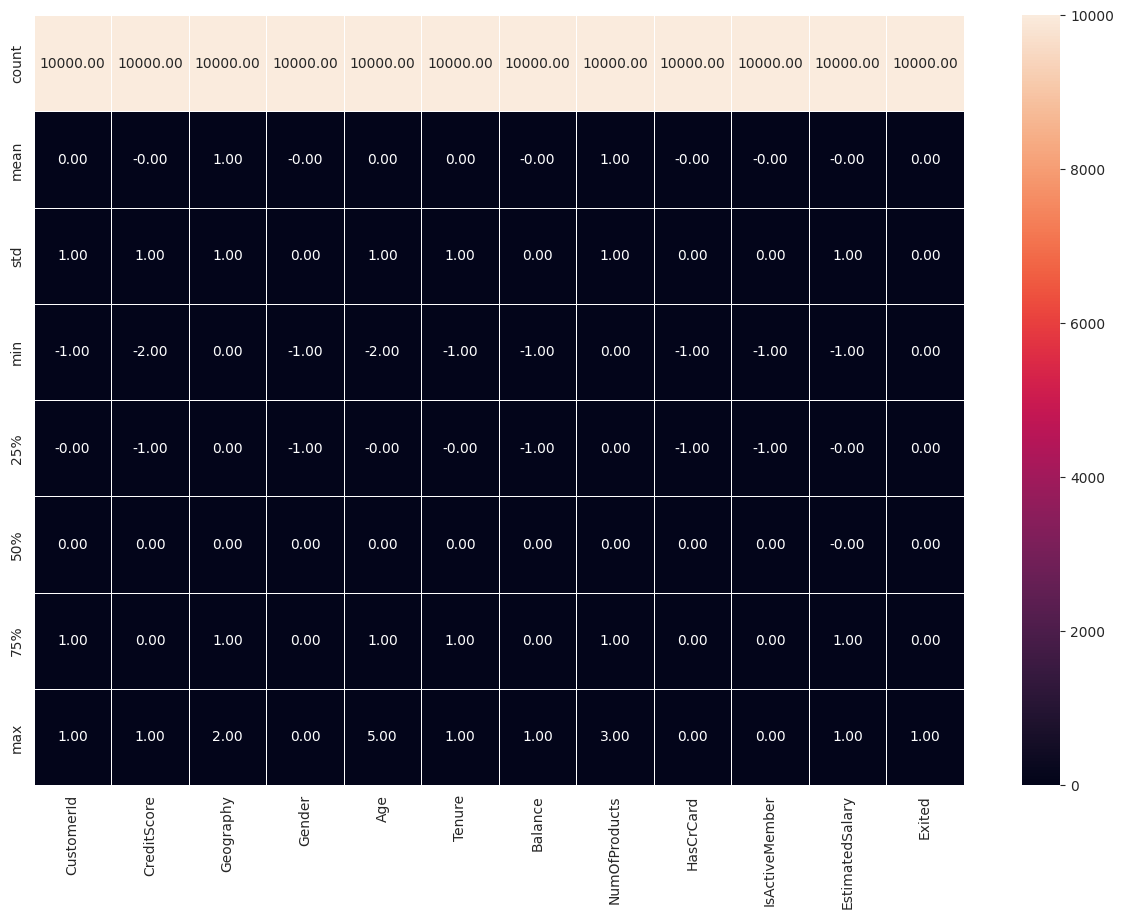

In [74]:
plt.figure(figsize=(15,10))
sns.heatmap(data=round(df3.describe()),annot=True,fmt=".2f",linewidth=0.6)